<img src = "images/Logo.png" width = 220, align = "left">

<h1 align=center><font size = 6>Anscombe's Quartet</font></h1>
<h2 align=center><font size = 5>Lab Exercise 2.9</font></h2>
<h3 align=center><font size = 4><b>Advanced Machine Learning<br></b><small>From Theory to Practice with NumPy and scikit-learn<br><i>Volume 1: Generalized Linear Models</i></font></h3>

## Introduction

In this example, we take Anscombe's quartet, which comprises four datasets that have nearly identical simple descriptive statistics, yet appear very different when graphed. Thus, we try to emphasize in this exercise the importance of graphing. <br>
**Note**: *The original datasets can be found at https://en.wikipedia.org/wiki/Anscombe%27s_quartet.*

### Table of contents
1. [Reading and converting the data](#ReadingData)
2. [Regression model fit and analysis without graphs](#RegressionAnalysisNoGraph)
3. [Box plots of the datasets](#Boxplot)
3. [Scatter plot of the datasets](#ScatterPlot)
4. [Root cause analysis](#RootCause)

## 1. Reading and converting the data <a name="ReadingData"></a>

First, import the required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os
%matplotlib inline

Read the AnscombeQuartet.csv into pandas dataframe and make a printout of the observations.

In [2]:
data = pd.read_csv(os.path.join('data','AnscombeQuartet.csv'))
print("Data #1:   Data #2:   Data #3:   Data #4:  ")
print("========= ========== ========== =========\n",data.to_string(index=False))

Data #1:   Data #2:   Data #3:   Data #4:  
========= ========== ========== =========
  x1     y1  x2    y2  x3     y3  x4     y4
 10   8.04  10  9.14  10   7.46   8   6.58
  8   6.95   8  8.14   8   6.77   8   5.76
 13   7.58  13  8.74  13  12.74   8   7.71
  9   8.81   9  8.77   9   7.11   8   8.84
 11   8.33  11  9.26  11   7.81   8   8.47
 14   9.96  14  8.10  14   8.84   8   7.04
  6   7.24   6  6.13   6   6.08   8   5.25
  4   4.26   4  3.10   4   5.39  19  12.50
 12  10.84  12  9.13  12   8.15   8   5.56
  7   4.82   7  7.26   7   6.42   8   7.91
  5   5.68   5  4.74   5   5.73   8   6.89


Extract the input and output values from the pandas dataframe into matrices $\mathbf{X}$ and $\mathbf{Y}$. In this case, each column of $\mathbf{X}$ represents the input vector of the corresponding dataset, while each column of $\mathbf{Y}$ represents the output vector of the corresponding dataset. Also, extract the number of observations available in the datasets.

In [3]:
X=np.array(data[['x1','x2','x3','x4']])
Y=np.array(data[['y1','y2','y3','y4']])
N,_=data.shape
print("Number of observations in the data set are:",N)

Number of observations in the data set are: 11


There are 11 observations in each of the four data sets. Let's make our linear regression analysis without making any graph, like box plot or scatter plot.

## 2. Regression model fit and analysis without graphs <a name="RegressionAnalysisNoGraph"></a>

First, initialize a separate pandas dataframe, which we can use to print out our regression analysis in a compact form.

In [4]:
initval=[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
col={'Data #1':initval,'Data #2':initval,'Data #3':initval,'Data #4':initval}
idx=['Sample mean of x','Sample variance of x','Sample mean of y','Sample variance of y','Correlation coefficient',\
     'Intercept of the linear model','Slope of the linear model','Coefficient of determination','Regression standard error']
df=pd.DataFrame(data=col,index=idx)

Calculate the mean and variance of $x$ and $y$ for each dataset. Fit the simple linear regression line then calculate the correlation coefficient and coefficient of determination for each dataset. For the slope we use the formula deduced in the book, namely $w=\frac{S_{xy}}{S_x^2}$, while for the intercept the already known formula $b=\overline y-w\overline x$.

In [5]:
df.loc['Sample mean of x']=np.mean(X,axis=0)
df.loc['Sample mean of y']=np.mean(Y,axis=0)
df.loc['Sample variance of x']=np.var(X,axis=0,ddof=1)
df.loc['Sample variance of y']=np.var(Y,axis=0,ddof=1)
df.loc['Correlation coefficient']=[np.corrcoef(X[:,i],Y[:,i])[0,1] for i in range(4)]
w_=[np.cov(X[:,i],Y[:,i],ddof=1)[0,1]/np.var(X[:,i],ddof=1) for i in range(4)]
df.loc['Intercept of the linear model']=w_
b_=np.mean(Y,axis=0)-np.mean(X,axis=0)*w_
df.loc['Slope of the linear model']=b_
r2_=[1-np.sum((Y[:,i]-(w_[i]*X[:,i]+b_[i]))**2)/np.sum((Y[:,i]-Y[:,i].mean())**2) for i in range(4)]
df.loc['Coefficient of determination']=r2_
mse_=[np.sqrt(np.sum((Y[:,i]-(w_[i]*X[:,i]+b_[i]))**2)/(N-2)) for i in range(4)]
df.loc['Regression standard error']=mse_

Print out the pandas dataframe (table) of the OLS results (including model parameters and metrics).

In [6]:
print(df)

                                 Data #1    Data #2    Data #3    Data #4
Sample mean of x                9.000000   9.000000   9.000000   9.000000
Sample variance of x           11.000000  11.000000  11.000000  11.000000
Sample mean of y                7.500909   7.500909   7.500000   7.500909
Sample variance of y            4.127269   4.127629   4.122620   4.123249
Correlation coefficient         0.816421   0.816237   0.816287   0.816521
Intercept of the linear model   0.500091   0.500000   0.499727   0.499909
Slope of the linear model       3.000091   3.000909   3.002455   3.001727
Coefficient of determination    0.666542   0.666242   0.666324   0.666707
Regression standard error       1.236603   1.237214   1.236311   1.235695


We can conclude that the datasets seem very alike, having the same input/output means and variances, the same correlation coefficients, and fitting the same linear regression line with equal metrics (coefficient of determination and regression standard error). <br>
Let's see how much we can trust these numbers.

## 3. Box plots of the datasets <a name="Boxplot"></a>

The first attempt would be to check some descriptive statistics other than the mean and standard deviation. For this, we can use pandas dataframe "describe" method directly.

In [7]:
data.describe()

,x1,y1,x2,y2,x3,y3,x4,y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,7.500909,9.000000,7.500909,9.000000,7.500000,9.000000,7.500909
std,3.316625,2.031568,3.316625,2.031657,3.316625,2.030424,3.316625,2.030579
min,4.000000,4.260000,4.000000,3.100000,4.000000,5.390000,8.000000,5.250000
25%,6.500000,6.315000,6.500000,6.695000,6.500000,6.250000,8.000000,6.170000
50%,9.000000,7.580000,9.000000,8.140000,9.000000,7.110000,8.000000,7.040000
75%,11.500000,8.570000,11.500000,8.950000,11.500000,7.980000,8.000000,8.190000
max,14.000000,10.840000,14.000000,9.260000,14.000000,12.740000,19.000000,12.500000


We can see from the table that the datasets are not identically distributed (for example, they have a different minimum or maximum values) even though they have the same means and variances. Let's create a box plot of the inputs using the "boxplot" method of the pandas dataframe.

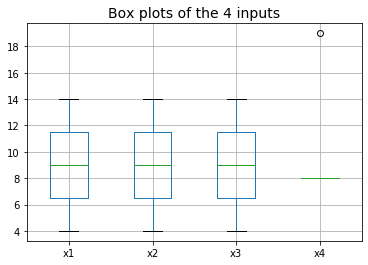

In [8]:
data.boxplot(column=["x1","x2","x3","x4"])
plt.title("Box plots of the 4 inputs",fontsize=14)
plt.show()

The same can be applied to the outputs.

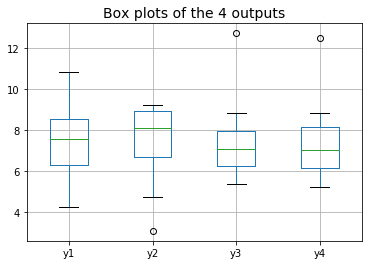

In [9]:
data.boxplot(column=["y1","y2","y3","y4"])
plt.title("Box plots of the 4 outputs",fontsize=14)
plt.show()

The "boxplot" method of the pandas dataframe uses the "boxplot" method of matplotlib library, and if we want to provide a title to the boxplot we can do this through *matplotlib.plot.title* method. Let's use now directly the "boxplot" method of matplotlib.pyplot and make some adjustment about how the boxplot, whiskers, and outliers are presented.

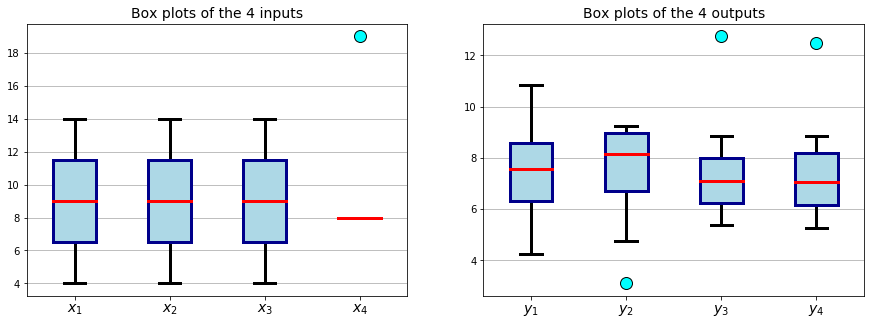

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
bp=ax[0].boxplot([data["x1"],data["x2"],data["x3"],data["x4"]],patch_artist=True,\
                 boxprops = dict(linestyle='-', linewidth=3, color='darkblue',facecolor='lightblue'),\
                 whiskerprops=dict(linestyle='-', linewidth=3, color='black'),\
                 medianprops=dict(linestyle='-', linewidth=3, color='red'),\
                 capprops=dict(linestyle='-', linewidth=3, color='black'),\
                 flierprops=dict(marker='o', markerfacecolor='cyan', markersize=12))
ax[0].set_xticklabels(["$x_1$","$x_2$","$x_3$","$x_4$"], fontdict ={'fontsize':14})
ax[0].yaxis.grid(True)
ax[0].set_title("Box plots of the 4 inputs", fontsize=14)
ax[1].boxplot([data["y1"],data["y2"],data["y3"],data["y4"]], patch_artist=True,\
                 boxprops = dict(linestyle='-', linewidth=3, color='darkblue',facecolor='lightblue'),\
                 whiskerprops=dict(linestyle='-', linewidth=3, color='black'),\
                 medianprops=dict(linestyle='-', linewidth=3, color='red'),\
                 capprops=dict(linestyle='-', linewidth=3, color='black'),
                 flierprops=dict(marker='o', markerfacecolor='cyan', markersize=12))
ax[1].set_xticklabels(["$y_1$","$y_2$","$y_3$","$y_4$"], fontdict ={'fontsize':14})
ax[1].set_title("Box plots of the 4 outputs", fontsize=14)
ax[1].yaxis.grid(True)
plt.show()

We see that there are some differences in the distribution of the boxplots. Thus, our earlier assumption that the datasets represent the same distribution based on the statistics needs to be remediated. The datasets are not only different, but they do not represent the same distribution. Moreover, outliers are present in the 3rd and 4th datasets (in case of the 4th dataset both in $x$ and $y$ direction, which might indicate an influential point due to high leverage). 

## 4. Scatter plot of the datasets <a name="ScatterPlot"></a>

Although the box plots provide a glimpse of your data, the relation between input and output can be observed only from the scatter plot. So, let's make the scatter plot of the four datasets.

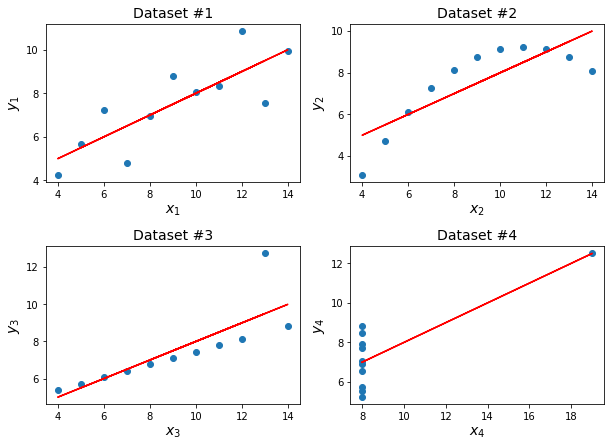

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(10, 7))
fig.subplots_adjust(hspace=0.4)
for i in range(4):
    ax[i//2,i%2].scatter(X[:,i],Y[:,i])
    ax[i//2,i%2].plot(X[:,i],X[:,i]*w_[i]+b_[i],'r')
    ax[i//2,i%2].set_title('Dataset #'+str(i+1),fontsize=14)
    ax[i//2,i%2].set_xlabel('$x_'+str(i+1)+'$',fontsize=14)
    ax[i//2,i%2].set_ylabel('$y_'+str(i+1)+'$',fontsize=14)
plt.show()

From the graphs we have a completely different picture:
- The first scatter plot (top left) appears to be a simple linear relationship, corresponding to two variables ($x_1$ and $y_1$) correlated and following the assumption of normality.
- The second graph (top right) shows a nonlinear (parabolic) relationship between the two variables ($x_2$ and $y_2$).
- In the third graph (bottom left), the relation is linear but should have a slightly different regression line. The calculated regression is offset by the outlier. Removing the outlier the correlation would be increased between the two variables (($x_3$ and $y_3$)).
- Finally, the fourth graph (bottom right) shows an example when one outlier is enough to produce a high correlation coefficient, even though the other data points do not indicate any relationship between the variables ($x_4$ and $y_4$).

**Note:** *It should be observed that the box plot for the output of the 2nd dataset shows an outlier. However, looking at the scatter plot (top right) we cannot see any outlier. The reason is that $y$ values of the observations are mostly in the interval of [6,10], only two out of the 11 observations have $y<6$. Thus, the minimum value of $y$ is considered an outlier in the box plot.*

## 5. Root cause analysis <a name="RootCause"></a>

Let's check one by one of these graphs. The first dataset should be already familiar, the scatter plot shows a linear relationship between input and output variables. No outlier is present, so we do not need to further analyze. <br>
The second one seems to be a parabolic shape, so let's try to fit one using polynomial regression. <br>
**Note:** *Polynomial regression models are discussed in Chapter 3 of the book.*

In [12]:
linregr=LinearRegression()
X2=np.array([X[:,1],X[:,1]**2]).T
linregr.fit(X2,Y[:,1])
print("Coefficients of the linear model:",linregr.coef_)
print("Constant term (intercept) of the linear model:",linregr.intercept_)
resid=np.sum((Y[:,1]-linregr.predict(X2))**2)
print("Residual Sum of Squares: RSS =",resid)

Coefficients of the linear model: [ 2.78083916 -0.12671329]
Constant term (intercept) of the linear model: -5.995734265734267
Residual Sum of Squares: RSS = 2.237762237763242e-05


Because $\text{RSS}\cong0$, the relationship between x and y is (almost) deterministic.
That is, $y=-5.99573426573+2.78083916 x -0.12671329 x^2$ <br>
Let's, plot the polinomial regression line together with the scatter plot.

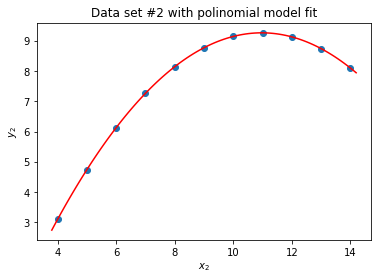

In [13]:
plt.scatter(X[:,1],Y[:,1])
x_=np.linspace(3.8,14.2,100)
plt.plot(x_,linregr.predict(np.array([x_,x_**2]).T),'r')
plt.title("Data set #2 with polinomial model fit")
plt.xlabel("$x_2$")
plt.ylabel("$y_2$")
plt.show()

As a conclusion, fitting a linear relationship on a nonlinear data is not revealed by the correlation coefficient ($r=0.82$), nor by the coefficient of determination ($R^2=0.67$). Thus, one should check the data graphically before making any assessment of the goodness of the model.

In the case of the 3rd dataset, we see that there is an outlier. Let's remove this outlier from the third data set.

In [14]:
x3_=X[:,2]
y3_=Y[:,2]
idx=np.argmax(y3_)
x3_=np.delete(x3_,idx,axis=0)
y3_=np.delete(y3_,idx,axis=0)
print("Correlation of coefficient:",np.corrcoef(x3_,y3_)[0,1])
linregr.fit(x3_.reshape(-1, 1),y3_)
print("Intercept and slope of the model:",linregr.coef_[0],linregr.intercept_)

Correlation of coefficient: 0.9999965537848281
Intercept and slope of the model: 0.34538961038961047 4.005649350649351


We and up again in a deterministic relationship between $x$ and $y$ ($y=0.34538961039+4.00564935065 \cdot x$) after removing the outlier because $r\cong+1$.

As a conclusion, we have a deterministic relationship without the outlier while we have a weak relationship between $x$ and $y$ with the outlier. We can create the scatter plot together with the estimated regression line to make this visible after the outlier removed. 

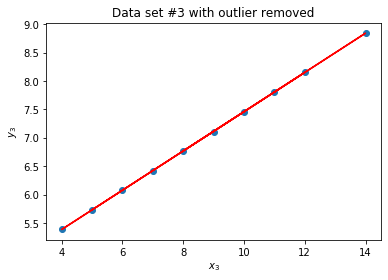

In [15]:
plt.scatter(x3_,y3_)
plt.plot(x3_[:,np.newaxis],linregr.predict(x3_[:,np.newaxis]),'r')
plt.title("Data set #3 with outlier removed")
plt.xlabel("$x_3$")
plt.ylabel("$y_3$")
plt.show()

Finally, let's remove the outlier from the fourth data set. Because the variance of $x$ is zero, we cannot compute the correlation coefficient, only the covariance between the $x$ and $y$.

In [16]:
x4_=X[:,3]
y4_=Y[:,3]
idx=np.argmax(y4_)
x4_=np.delete(x4_,idx,axis=0)
y4_=np.delete(y4_,idx,axis=0)
print("Variance of x:",np.var(x4_))
print("Covariance between input and output:",np.cov(x4_,y4_)[0,1])

Variance of x: 0.0
Covariance between input and output: 0.0


The dataset with the outlier included shows a relatively strong correlation between the input and output ($r=0.82$). However, removing the outlier, there is no correlation between the input and output.

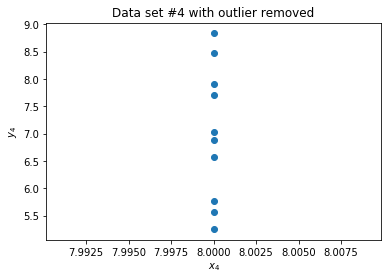

In [17]:
plt.scatter(x4_,y4_)
plt.title("Data set #4 with outlier removed")
plt.xlabel("$x_4$")
plt.ylabel("$y_4$")
plt.show()

In conclusion, we should never trust only the numbers. A visual inspection shall be always carried out.

<img src = "images/AML1-Cover.png" width = 90, align = "left" style="margin:0px 20px">

**Note:** This Jupyter Notebook is accompanying the book: <br><i>"Machine Learning - From Theory to Practice with NumPy and scikit-learn, Volume 1: Generalized Linear Models"</i><br>
by Ferenc Farkas, Ph.D. 

If you find this Notebook useful, please support me by buying the book at [Leanpub](http://leanpub.com/AML1). <br>
Copyright notice: This Jupyter Notebook is made available under the [MIT License](https://opensource.org/licenses/MIT).